In [2]:
import numpy as np 
import pandas as pd 
import os
leng = 0
directory = './input'
if not os.path.exists(directory):
    print(f"Directory '{directory}' does not exist.")
else:
    print(f"Listing files under '{directory}':")
    for dirname, _, filenames in os.walk(directory):
        for filename in filenames:
            leng+=1

print(f"Total number of files: {leng}")

Listing files under './input':
Total number of files: 3264


In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score

In [4]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf


In [5]:
# available GPU devices
print("GPU devices:")
print(tf.config.experimental.list_physical_devices('GPU'))

GPU devices:
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Train test split


In [6]:
# Divide the data into training and testing
X_train, Y_train = [], []
image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


for i in labels:
    folderPath = os.path.join('./input/Training/', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(labels.index(i))


for i in labels:
    folderPath = os.path.join('./input/Testing/', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(labels.index(i))

In [7]:
# Now ,we have all the train and test images in X_train and Y_train. Collected all in 1 list so that we can shuffle them.

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_train, Y_train = shuffle(X_train, Y_train, random_state=101)

In [8]:
# split the data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=0)

In [9]:
# shapes

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")

print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_test: {Y_test.shape}")

Shape of X_train: (2937, 150, 150, 3)
Shape of Y_train: (2937,)
Shape of X_test: (327, 150, 150, 3)
Shape of Y_test: (327,)


In [10]:
Y_train = keras.utils.to_categorical(Y_train,4)
Y_test = keras.utils.to_categorical(Y_test,4)

In [11]:
# shapes :
Y_train.shape, Y_test.shape

((2937, 4), (327, 4))

## Model Architecture CNN


In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
          input_shape=(image_size, image_size, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [14]:
# compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
# This model is inspired from the VGG16 model. It has 5 convolutional layers and 3 dense layers. The model is compiled using the Adam optimizer and the loss function is categorical crossentropy.

In [15]:
history = model.fit(X_train, Y_train, epochs=20, validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 14s 102ms/step - loss: 2.4273 - accuracy: 0.2906 - val_loss: 1.3594 - val_accuracy: 0.2789
Epoch 2/20
83/83 [==============================] - 6s 73ms/step - loss: 1.3262 - accuracy: 0.3462 - val_loss: 1.3623 - val_accuracy: 0.3810
Epoch 3/20
83/83 [==============================] - 6s 73ms/step - loss: 1.0702 - accuracy: 0.5365 - val_loss: 1.1081 - val_accuracy: 0.4660
Epoch 4/20
83/83 [==============================] - 6s 75ms/step - loss: 0.9232 - accuracy: 0.6099 - val_loss: 1.0600 - val_accuracy: 0.5442
Epoch 5/20
83/83 [==============================] - 6s 76ms/step - loss: 0.7728 - accuracy: 0.6788 - val_loss: 0.8579 - val_accuracy: 0.5884
Epoch 6/20
83/83 [==============================] - 6s 73ms/step - loss: 0.6975 - accuracy: 0.7003 - val_loss: 1.0124 - val_accuracy: 0.5782
Epoch 7/20
83/83 [==============================] - 6s 73ms/step - loss: 0.6487 - accuracy: 0.7291 - val_loss: 0.9377 - val_accuracy: 0.5748
Epoch 8/20


In [16]:
model.save('model1.h5')

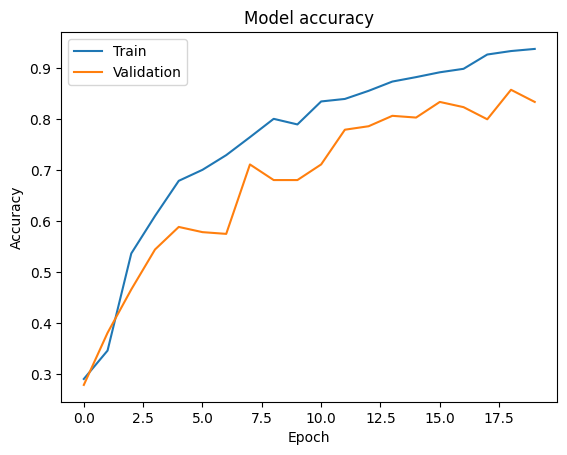

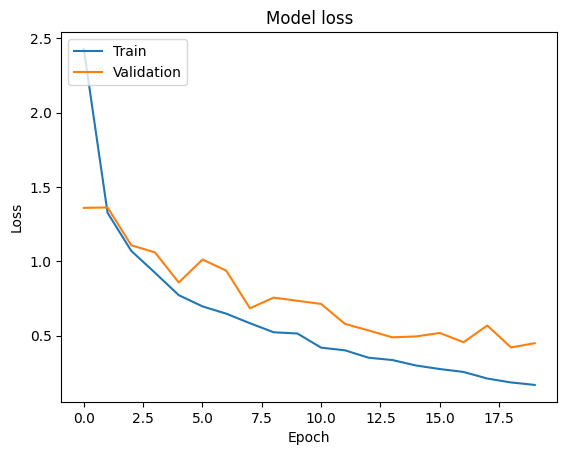

In [18]:
# acc = history.history['accuracy']

# visualize valiadation and training accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')

plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



Prediction


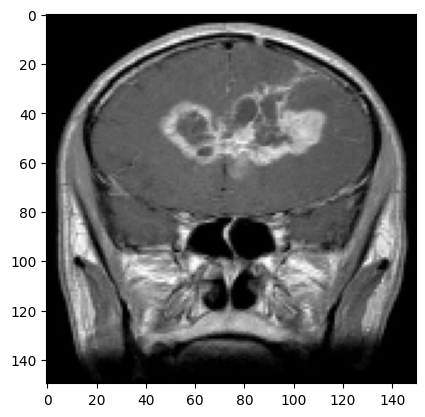

In [24]:
img = cv2.imread('./input/Testing/glioma_tumor/image(1).jpg')
img = cv2.resize(img, (image_size, image_size))
img = np.reshape(img, [1, image_size, image_size, 3])
# visualize the image
plt.imshow(cv2.cvtColor(img[0], cv2.COLOR_BGR2RGB))

In [25]:
# predict the image
print(f"Predicted class: {labels[np.argmax(model.predict(img))]}")

1/1 [==============================] - 1s 694ms/step
Predicted class: glioma_tumor


1/1 [==============================] - 0s 21ms/step
Predicted class: no_tumor


(None,)

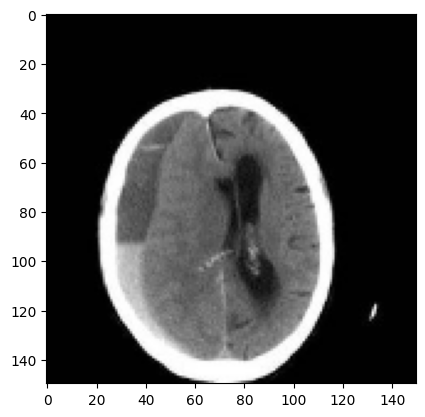

In [28]:
# another image from no_tumor
img = cv2.imread('./input/Testing/no_tumor/image(1).jpg')
img = cv2.resize(img, (image_size, image_size))
img = np.reshape(img, [1, image_size, image_size, 3]) #This will reshape the image to the required shape: (1, 150, 150, 3)
# visualize the image
plt.imshow(cv2.cvtColor(img[0], cv2.COLOR_BGR2RGB))

# predict the image
print(f"Predicted class: {labels[np.argmax(model.predict(img))]}"),

In [29]:
# Final accuracy: 
history.history['val_accuracy'][-1]

0.8333333134651184